In [1]:
using BenchmarkTools

In [2]:
function maxpy!(a::Float64, x::Array{Float64,1}, y::Array{Float64,1})
    @simd for i=1:length(y)
        @inbounds y[i] += a * x[i]
    end
end

maxpy! (generic function with 1 method)

In [3]:
const a=1.2;

In [4]:
@benchmark maxpy!(a,x,y) setup=(x=rand(1000000); y=copy(x))

BenchmarkTools.Trial: 
  memory estimate:  0 bytes
  allocs estimate:  0
  --------------
  minimum time:     1.888 ms (0.00% GC)
  median time:      1.991 ms (0.00% GC)
  mean time:        1.990 ms (0.00% GC)
  maximum time:     2.344 ms (0.00% GC)
  --------------
  samples:          409
  evals/sample:     1

In [5]:
@benchmark y+=a*x setup=(x=rand(1000000); y=copy(x))

BenchmarkTools.Trial: 
  memory estimate:  15.26 MiB
  allocs estimate:  4
  --------------
  minimum time:     9.108 ms (0.00% GC)
  median time:      10.680 ms (4.68% GC)
  mean time:        23.381 ms (58.28% GC)
  maximum time:     74.352 ms (87.08% GC)
  --------------
  samples:          108
  evals/sample:     1

In [6]:
function blas_axpy!(a::Float64, x::Array{Float64,1}, y::Array{Float64,1})
    ccall( (:cblas_daxpy, "libopenblas"),
        Cvoid, (Clonglong, Cdouble, Ptr{Cdouble}, Clonglong, Ptr{Cdouble}, Clonglong),
        size(y,1), a, x, 1, y, 1)
end    

blas_axpy! (generic function with 1 method)

In [7]:
@benchmark blas_axpy!(a,x,y) setup=(x=rand(1000000); y=copy(x))

BenchmarkTools.Trial: 
  memory estimate:  0 bytes
  allocs estimate:  0
  --------------
  minimum time:     1.936 ms (0.00% GC)
  median time:      2.004 ms (0.00% GC)
  mean time:        2.006 ms (0.00% GC)
  maximum time:     2.904 ms (0.00% GC)
  --------------
  samples:          391
  evals/sample:     1

---

In [8]:
function measure_maxpy(n)
    t = @benchmark maxpy!(a,x,y) setup=(x=rand($n); y=copy(x))
    mflops = 2*n / BenchmarkTools.median(t).time * 1.e3
end

measure_maxpy (generic function with 1 method)

In [9]:
measure_maxpy(1000)

10435.405491204794

In [10]:
sizes = round.(Int, 10 .^range(1,stop=7,length=15))

15-element Array{Int64,1}:
       10
       27
       72
      193
      518
     1389
     3728
    10000
    26827
    71969
   193070
   517947
  1389495
  3727594
 10000000

In [11]:
mflops = [measure_maxpy(n) for n in sizes]

15-element Array{Float64,1}:
   510.72628586197976
  1302.524499621203  
  3295.698302022284  
  6753.956551656345  
  9021.624871511412  
 10225.291352778313  
  5344.204278194647  
  5701.796065760714  
  3999.2546213476444 
  3502.9081794066824 
  2658.7438203175566 
  1186.456518676576  
  1027.397298257023  
   984.306613746502  
   981.4925350867632 

In [12]:
using PyPlot

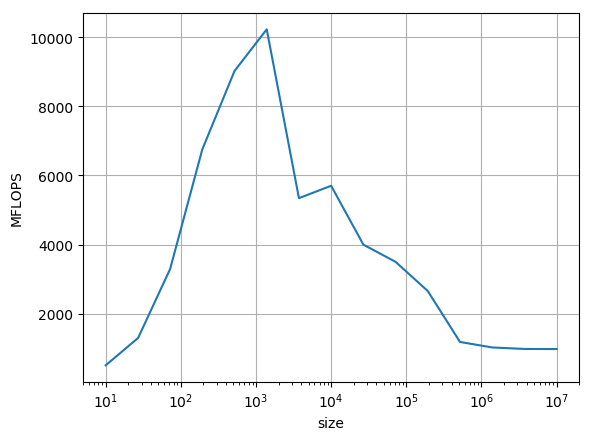

In [13]:
semilogx(sizes, mflops)
grid(true)
xlabel("size"); ylabel("MFLOPS");

In [14]:
function measure_blas(n)
    t = @benchmark blas_axpy!(a,x,y) setup=(x=rand($n); y=copy(x))
    mflops = 2*n / BenchmarkTools.median(t).time * 1.e3
end;

In [15]:
blas_mflops = [measure_blas(n) for n in sizes];

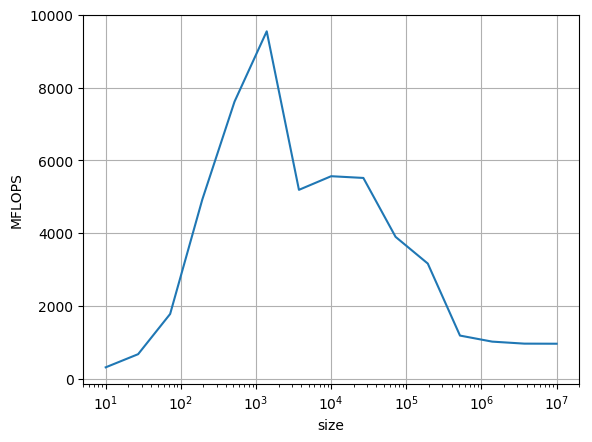

In [16]:
semilogx(sizes, blas_mflops)
grid(true)
xlabel("size"); ylabel("MFLOPS");